<a href="https://colab.research.google.com/github/Gus-oss/MachineLearning/blob/main/MachineLearningTarea3_EstadisticaDescriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning: Análisis de los datos sobre influenza, COVID-19 y otros virus respiratorios.

## Librerias y creación de carpeta de imagenes.

In [82]:
#Importamos las librerias que utilizaremos a lo largo del documento
import pandas as pd
import numpy as np
import statistics as stats   #utilizado en la parte estadistica descriptiva
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import os #Se utilizo para guardar las imagenes (carpeta) y para guardar las imagenes en la carpeta
import plotly.graph_objects as go #esta libreria es para hacer graficos dinamicos
from statsmodels.graphics.gofplots import qqplot #se utilizo para hacer la grafica cuartil cuartil

# Librerias para Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Carpeta única para guardar las imágenes
IMAGES_PATH = "Galeria"  # Nombre de la carpeta (puedes cambiarlo)
os.makedirs(IMAGES_PATH, exist_ok=True) # Crea la carpeta si no existe

def save_fig(fig_id, tight_layout=True, fig_extension="pdf", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id, "in", IMAGES_PATH) #Mensaje mas informativo
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
#Recomendación del Dr. Alberto Benavidez es generar imagenes en PDF para la creacion de articulos.
#A demas de antes de llamar la función, escribir plt.tight_layout() para quitar espacios
#inecesarios en las imagenes, este plt.tight_layout() ya se encuentra en la funcion pra guardar imagenes

## Obtencion de datos.

Los datos se actualizan cada cierto periodo de tiempo. Para esto, se automatizo la optención de los datos para que al momento de ejecutar el programa se estudien los datos mas recientes posibles publicados por la Direccion de Epidemiología de México.

In [83]:
import requests
from bs4 import BeautifulSoup

# URL de la página de datos abiertos
url = 'https://www.gob.mx/salud/documentos/datos-abiertos-152127'

# Obtener el HTML de la página
response = requests.get(url)
response.raise_for_status()
soup = BeautifulSoup(response.content, 'html.parser')

# Imprimir todos los enlaces en la página para ver su estructura
print("Enlaces encontrados en la página:")
for a in soup.find_all('a', href=True):
    print(a['href'])

Enlaces encontrados en la página:
/
/tramites
/gobierno
/salud/en
https://www.gob.mx/busqueda?utf8=✓
?tab=
/salud/es/archivo/prensa
/salud/es/#390
/salud/es/archivo/documentos
/salud/es/archivo/acciones_y_programas
/salud/es/archivo/multimedia
http://portal.salud.gob.mx/sites/transparencia/transparencia/proteccion_datos/proteccion_1_1.html
http://portal.salud.gob.mx/sites/transparencia/transparencia/transparencia/transparencia_1.html
http://www.gob.mx
/salud
/salud/articulos/hospital-general-de-mexico-conmemora-el-dia-mundial-del-linfoma-y-refuerza-la-importancia-de-la-deteccion-oportuna
/salud/articulos/destaca-el-inper-en-avances-tecnologicos-en-obstetricia-y-atencion-del-embarazo
/salud/articulos/un-tratamiento-adecuado-para-el-sindrome-de-turner-permite-el-buen-desarrollo-de-las-ninas-inp
/salud/articulos/realizan-sesion-cultural-en-el-marco-del-178-aniversario-del-hospital-juarez-de-mexico
/salud/articulos/revision-oftalmologica-clave-en-la-deteccion-de-la-enfermedad-de-coats
http

In [84]:
import requests
import zipfile
import io

# URL del Diccionario de datos
diccionario_url = 'https://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_influenza_covid19.zip'

# Descargar y abrir el archivo ZIP del Diccionario de datos
diccionario_zip_response = requests.get(diccionario_url)
diccionario_zip_response.raise_for_status()

with zipfile.ZipFile(io.BytesIO(diccionario_zip_response.content)) as diccionario_zip:
    # Listar los nombres de los archivos en el ZIP
    print("Archivos contenidos en el ZIP del Diccionario de datos:")
    for file_name in diccionario_zip.namelist():
        print(file_name)

ConnectionError: HTTPSConnectionPool(host='datosabiertos.salud.gob.mx', port=443): Max retries exceeded with url: /gobmx/salud/datos_abiertos/datos_abiertos_influenza_covid19.zip (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x78800266b950>: Failed to resolve 'datosabiertos.salud.gob.mx' ([Errno -2] Name or service not known)"))

In [ ]:
import requests
import zipfile
import io
import pandas as pd

# URLs directas para los archivos ZIP
covid_data_url = 'https://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_influenza_covid19.zip'
diccionario_url = 'https://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/diccionario_datos_abiertos.zip'

def descargar_datos_covid():
    # Descargar y procesar el archivo ZIP de datos COVID-19
    print("Descargando archivo ZIP de datos COVID-19 desde:", covid_data_url)
    covid_zip_response = requests.get(covid_data_url)
    covid_zip_response.raise_for_status()

    with zipfile.ZipFile(io.BytesIO(covid_zip_response.content)) as covid_zip:
        for file_name in covid_zip.namelist():
            if file_name.endswith('.csv'):
                print(f"Extrayendo {file_name}...")
                with covid_zip.open(file_name) as csv_file:
                    df_covid = pd.read_csv(csv_file)
                    print("Datos COVID-19 cargados correctamente en el DataFrame.")
                    break  # Salir después de encontrar el archivo CSV

    # Descargar y procesar el archivo ZIP del Diccionario de datos
    print("Descargando archivo ZIP del Diccionario de datos desde:", diccionario_url)
    diccionario_zip_response = requests.get(diccionario_url)
    diccionario_zip_response.raise_for_status()

    with zipfile.ZipFile(io.BytesIO(diccionario_zip_response.content)) as diccionario_zip:
        # Cargar los archivos Excel
        excel_file_catalogos = pd.read_excel(diccionario_zip.open('240708 Catalogos.xlsx'))
        df_descriptores = pd.read_excel(diccionario_zip.open('240708 Descriptores_.xlsx'))
        print("Archivos del Diccionario de datos cargados correctamente en DataFrames.")

        # Cargar hojas específicas en DataFrames separados
        df_enti = pd.read_excel(diccionario_zip.open('240708 Catalogos.xlsx'), sheet_name='Catálogo de ENTIDADES')
        df_muni = pd.read_excel(diccionario_zip.open('240708 Catalogos.xlsx'), sheet_name='Catálogo MUNICIPIOS')
        df_sector = pd.read_excel(diccionario_zip.open('240708 Catalogos.xlsx'), sheet_name='Catálogo SECTOR')
        df_pcr = pd.read_excel(diccionario_zip.open('240708 Catalogos.xlsx'), sheet_name='Catálogo RESULTADO_PCR')

    return df_covid, excel_file_catalogos, df_descriptores, df_enti, df_muni, df_sector, df_pcr

# Ejecutar la función y cargar los datos en los DataFrames
df_covid, excel_file_catalogos, df_descriptores, df_enti, df_muni, df_sector, df_pcr = descargar_datos_covid()

In [85]:
#hay un error al cargar la base de datos automaticamente, mientras se arregla el error se colocara manual la base de datos
df_covid = pd.read_csv('/content/COVID19MEXICO.csv')
df_descriptores = pd.read_excel('/content/240708 Descriptores_.xlsx')

## Limpieza de la base de datos.

In [86]:
df_covid #visualizamos la base de datos

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RESULTADO_PCR,RESULTADO_PCR_COINFECCION,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL_COVID,CLASIFICACION_FINAL_FLU,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2025-09-09,gd8311d,1,8,9,1,9,9,12,1,...,997,997,2,97,6,6,99,México,97,97
1,2025-09-09,g98e198,1,15,21,1,21,21,114,2,...,3,998,2,97,7,3,99,México,97,2
2,2025-09-09,g5075fe,1,6,9,1,29,9,5,2,...,5,5,2,97,7,7,99,México,97,2
3,2025-09-09,ga8a474,1,4,20,2,20,20,413,1,...,997,997,2,97,6,6,99,México,97,97
4,2025-09-09,gd25b0d,1,8,9,2,9,9,7,1,...,997,997,2,97,6,6,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110098,2025-09-09,g8fec22,1,12,12,1,12,12,44,2,...,999,999,2,97,6,6,99,México,97,2
110099,2025-09-09,g86c05b,1,12,14,2,14,14,37,1,...,997,997,2,97,6,6,99,México,97,97
110100,2025-09-09,g89cff3,1,3,21,1,21,21,114,1,...,997,997,2,97,6,6,99,México,97,97
110101,2025-09-09,gebab51,1,12,4,2,4,4,2,1,...,997,997,2,97,6,6,99,México,97,97


### Valores nulos

In [87]:
# Revisión de valores faltantes (NaN)
# Verificamos cuántos valores faltantes hay por columna
valores_nulos = df_covid.isnull().sum()
print("Valores faltantes por columna:\n", valores_nulos)

Valores faltantes por columna:
 FECHA_ACTUALIZACION          0
ID_REGISTRO                  0
ORIGEN                       0
SECTOR                       0
ENTIDAD_UM                   0
SEXO                         0
ENTIDAD_NAC                  0
ENTIDAD_RES                  0
MUNICIPIO_RES                0
TIPO_PACIENTE                0
FECHA_INGRESO                0
FECHA_SINTOMAS               0
FECHA_DEF                    0
INTUBADO                     0
NEUMONIA                     0
EDAD                         0
NACIONALIDAD                 0
EMBARAZO                     0
HABLA_LENGUA_INDIG           0
INDIGENA                     0
DIABETES                     0
EPOC                         0
ASMA                         0
INMUSUPR                     0
HIPERTENSION                 0
OTRA_COM                     0
CARDIOVASCULAR               0
OBESIDAD                     0
RENAL_CRONICA                0
TABAQUISMO                   0
OTRO_CASO                    0
TOMA_MU

Podemos encontrar que en el conjunto de datos no hay datos faltantes.

### Fortmato Fechas

In [88]:
# Revisión de tipos de datos
# Convertimos las columnas de fecha a formato datetime para análisis temporal
df_covid['FECHA_INGRESO']  = pd.to_datetime(
    df_covid['FECHA_INGRESO'],
    format="%Y-%m-%d",
    errors="coerce"
)

df_covid['FECHA_SINTOMAS'] = pd.to_datetime(
    df_covid['FECHA_SINTOMAS'],
    format="%Y-%m-%d",
    errors="coerce"
)

df_covid['FECHA_DEF']      = pd.to_datetime(
    df_covid['FECHA_DEF'],
    format="%Y-%m-%d",
    errors="coerce"
)

In [89]:
df_covid["FECHA_INGRESO"].unique() #NO CUENTA CON VALORES NaT

<DatetimeArray>
['2025-01-02 00:00:00', '2025-01-01 00:00:00', '2025-01-24 00:00:00',
 '2025-01-03 00:00:00', '2025-03-11 00:00:00', '2025-04-21 00:00:00',
 '2025-04-09 00:00:00', '2025-06-15 00:00:00', '2025-05-01 00:00:00',
 '2025-03-12 00:00:00',
 ...
 '2025-09-01 00:00:00', '2025-08-30 00:00:00', '2025-08-31 00:00:00',
 '2025-09-02 00:00:00', '2025-09-03 00:00:00', '2025-09-04 00:00:00',
 '2025-09-05 00:00:00', '2025-09-06 00:00:00', '2025-09-07 00:00:00',
 '2025-09-08 00:00:00']
Length: 251, dtype: datetime64[ns]

In [90]:
df_covid["FECHA_SINTOMAS"].unique() #No cuenta con valores NaT

<DatetimeArray>
['2025-01-01 00:00:00', '2025-01-02 00:00:00', '2025-01-24 00:00:00',
 '2025-03-11 00:00:00', '2025-04-20 00:00:00', '2025-04-09 00:00:00',
 '2025-06-12 00:00:00', '2025-04-30 00:00:00', '2025-03-12 00:00:00',
 '2025-04-13 00:00:00',
 ...
 '2025-08-30 00:00:00', '2025-08-31 00:00:00', '2025-09-01 00:00:00',
 '2025-09-02 00:00:00', '2025-09-03 00:00:00', '2025-09-04 00:00:00',
 '2025-09-05 00:00:00', '2025-09-06 00:00:00', '2025-09-07 00:00:00',
 '2025-09-08 00:00:00']
Length: 251, dtype: datetime64[ns]

In [91]:
df_covid["FECHA_DEF"].unique()

<DatetimeArray>
[                'NaT', '2025-01-31 00:00:00', '2025-01-10 00:00:00',
 '2025-01-03 00:00:00', '2025-01-16 00:00:00', '2025-02-02 00:00:00',
 '2025-01-02 00:00:00', '2025-01-04 00:00:00', '2025-01-06 00:00:00',
 '2025-01-22 00:00:00',
 ...
 '2025-09-07 00:00:00', '2025-09-08 00:00:00', '2025-08-28 00:00:00',
 '2025-08-23 00:00:00', '2025-09-02 00:00:00', '2025-08-27 00:00:00',
 '2025-09-01 00:00:00', '2025-08-30 00:00:00', '2025-08-31 00:00:00',
 '2025-09-04 00:00:00']
Length: 251, dtype: datetime64[ns]

Al cambiar las fechas a datatime con el formato yyyy-mm-dd apreciamos que en la columna *FECHA_DEF* se encuentran valores NaT( conjunto original de datos se tenia como 9999-99-99, pero al hacer la conversion a datatime se colodaron NaT)  los cuales significan Not a Time, lo que quiere decir que no se tiene registro de fecha de defunción. Esto puede significar :


*   el paciente fallecio y no se registro la fecha de defunción
*   o el paciente no fallecio y se recupero

Se investiga cuantos NaT se tienen registrados en el conjunto de datos.

In [92]:
# Contar los valores NaT en una columna específica
nat_count_fecha_def = df_covid['FECHA_DEF'].isna().sum()
print(f"Valores NaT en la columna FECHA_DEF: {nat_count_fecha_def}")

Valores NaT en la columna FECHA_DEF: 105827


In [93]:
# Obtener el número de filas
num_filas = df_covid.shape[0]
print(f"El DataFrame tiene {num_filas} filas.")

El DataFrame tiene 110103 filas.


Como el numero de NaT que hay en la columna FECHA_DEF es muy cercano al numero de filas que tiene el dataframe df_covid se optio por no eliminar las filas que tengan NaT y se conservaran.

### Duplicados

In [94]:
num_filas_original = df_covid.shape[0]
num_filas_unicas = df_covid.drop_duplicates().shape[0]
print(f"Total filas originales: {num_filas_original}")
print(f"Total filas únicas: {num_filas_unicas}")
#En caso de encontrar filas duplicadas se tendria que utilizar df_covid = df_covid.drop_duplicates()

Total filas originales: 110103
Total filas únicas: 110103


No se encontraron filas duplicadas en el conjunto de datos.

### Edad

In [95]:
df_covid['EDAD'].unique()

array([ 57,   2,  86,  23,  75,  18,  24,  47,  65,  51,  69,  62,  10,
        67,  30,  64,  29,  32,  40,   1,  19,   6,  63,  39,  48,  36,
        26, 102,  54,  31,  25,  70,  33,  71,  37,  44,  28,  87,  49,
         3,  14,  56,  77,  27,  68,   4,  42,  72,  82,  17,  52,  73,
        22,   9,  88,  16,  61,  34,   8,  53,  55,  76,  59,  21,  46,
        79,  38,  41,  74,  85,  58,  60,  83,  80,  35,  45,  43,  89,
        94,  84,  66,  12,  50,  96,   5,   7,  11,  13,  90,   0,  20,
        81,  95,  78,  15,  92,  91,  93,  98,  97,  99, 101, 103, 110,
       100, 105, 104, 106, 107, 108, 111, 109])

Verificamos que las edades estan correctas y que no hay errores de typing al momento de realizar la captura de las edades.

## Estadistica Descriptiva.

En esta sección realizaremos:

- Comprobar si en el conjunto de datos son parametricos o no parametricos.
- Calcular estadisticos descriptivos básicos.
- Matriz de correlaciones.
- Realizar pruebas de hipótesis a partir de las conclusiones obtenidas en la matriz de correlación.
- Realizar graficos estadisticos.

### Estadisticos.

Realizamos un analisis de los estadisticos de media, moda y mediana a la variable EDAD del conjunto de datos.

In [96]:
edades = df_covid['EDAD'].tolist()

print("Promedio:", stats.mean(edades))
print("Mediana :", stats.median(edades))
print("Moda(s) :", stats.multimode(edades))

Promedio: 36.66842865317021
Mediana : 35
Moda(s) : [1]


La mayoría de los casos de COVID-19 en este conjunto de datos corresponden a adultos jóvenes (aproximadamente 37 años, mediana 35 años). Sin embargo, la moda de 1 año sugiere un pico artificial o un sesgo: podría reflejar una alta proporción de casos en menores de 1 año.

Ahora realizamos un diagrama de cajas con vigotes para esta misma variable

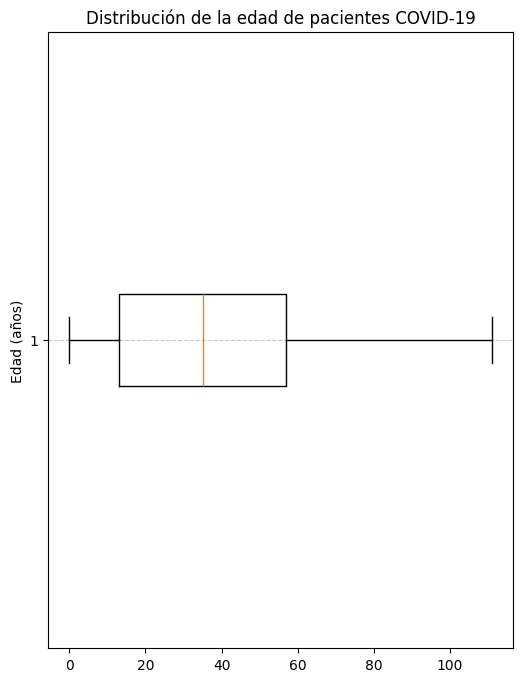

Saving figure boxplot_edad in Galeria


<Figure size 640x480 with 0 Axes>

In [97]:
# Elimina valores nulos si existen
edades = df_covid['EDAD']

plt.figure(figsize=(6, 8))
plt.boxplot(edades, vert=False)
plt.title('Distribución de la edad de pacientes COVID-19')
plt.ylabel('Edad (años)')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # líneas de referencia
plt.show()


save_fig("boxplot_edad", fig_extension="pdf")

Saving figure violinplot_edad in Galeria


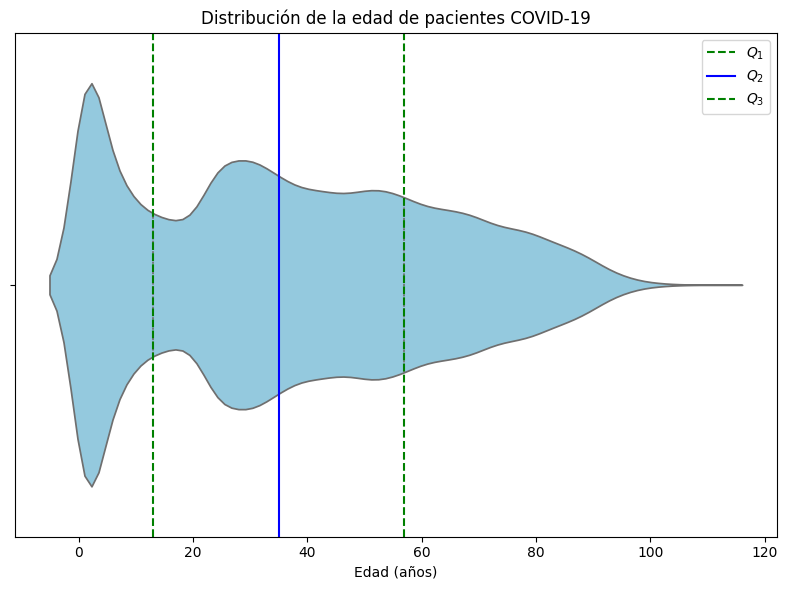

In [98]:
plt.figure(figsize=(8,6))
sns.violinplot(x=df_covid['EDAD'], color="skyblue", inner="quartile")
plt.axvline(
    x = stats.quantiles(df_covid['EDAD'], n=4)[0],
    label = '$Q_1$',
    linestyle = '--',
    color = 'green'
)
plt.axvline(
    x = stats.quantiles(df_covid['EDAD'], n=4)[1],
    label = '$Q_2$',
    linestyle = '-',
    color = 'blue'
)
plt.axvline(
    x = stats.quantiles(df_covid['EDAD'], n=4)[2],
    label = '$Q_3$',
    linestyle = '--',
    color = 'green'
)
plt.legend()
plt.title("Distribución de la edad de pacientes COVID-19")
plt.xlabel("Edad (años)")

# Guardar la figura
save_fig("violinplot_edad", fig_extension="pdf")

plt.show()

Grafica Cuartil-cuartil de las edades del conjunto de datos del covid-19

Saving figure cuartilcuartil_edad in Galeria


<Figure size 640x480 with 0 Axes>

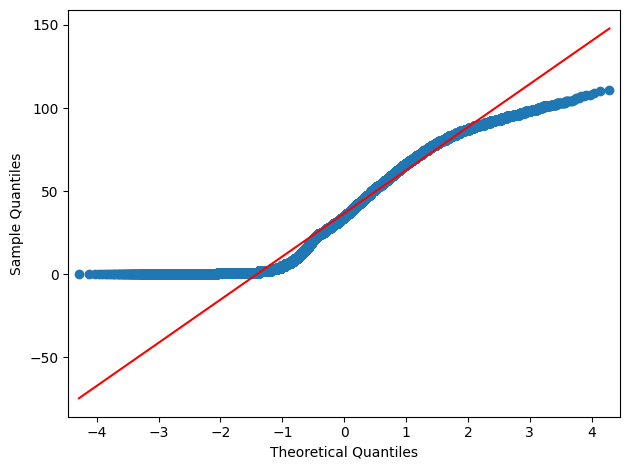

In [99]:
plt.figure()
qqplot(df_covid['EDAD'], line ='s')

# Guardar la figura
save_fig("cuartilcuartil_edad", fig_extension="pdf")
plt.show()

De acuerdo a la grafica, se sospecha que la muestra respecto a las edades no es parametrica.

### Correlaciones

In [102]:
df_covid.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_PCR',
       'RESULTADO_PCR_COINFECCION', 'TOMA_MUESTRA_ANTIGENO',
       'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL_COVID',
       'CLASIFICACION_FINAL_FLU', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'],
      dtype='object')

Saving figure Correlacion_Condiciones_Pacientes_Intubados_COVID19 in Galeria


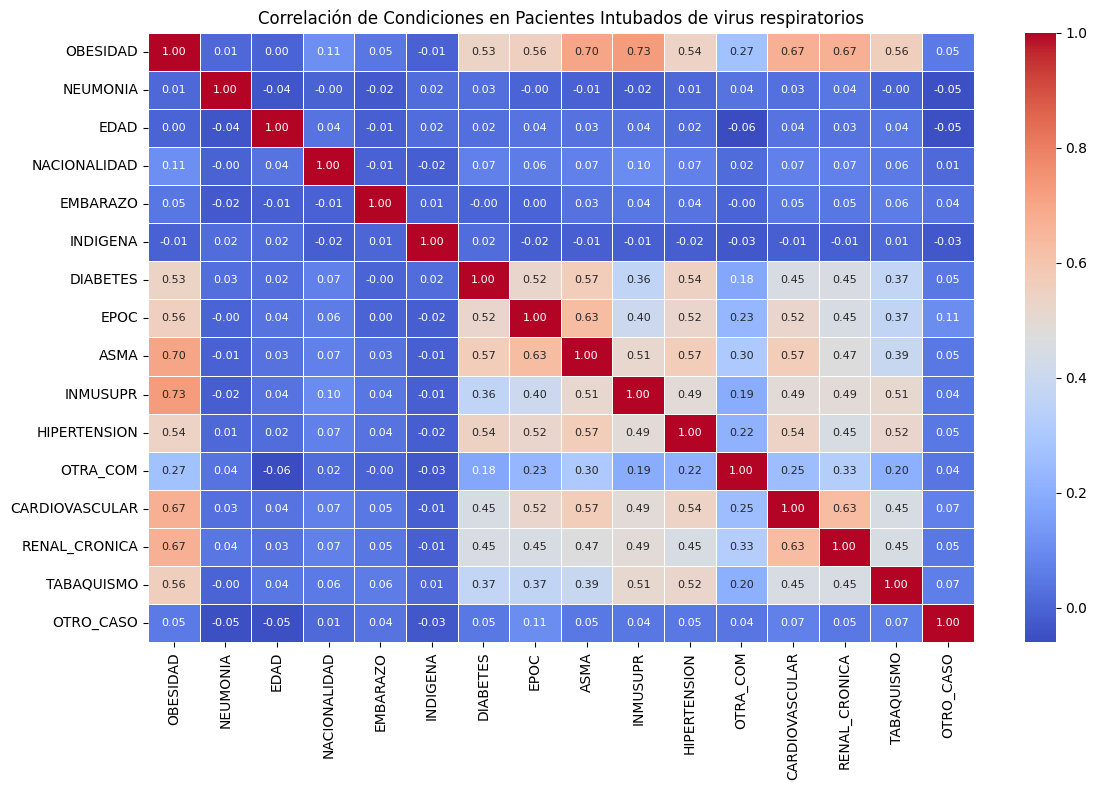

In [104]:
columns_to_replace = [
    'NEUMONIA', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
    'HIPERTENSION', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA'
]

for col in columns_to_replace:
    df_covid[col] = df_covid[col].replace({'SI': 1}).astype('Int64')  # Usar 'Int64' para manejar valores nulos


# Filtrar pacientes intubados
df_covid19_intubado = df_covid[df_covid['INTUBADO'] == 1]  # Usamos 1 para "Sí"

# Seleccionar las columnas de interés
df_covid19_resultado = df_covid19_intubado[['OBESIDAD', 'NEUMONIA', 'EDAD',
                                                'NACIONALIDAD', 'EMBARAZO', 'INDIGENA', 'DIABETES',
                                                'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
                                                'CARDIOVASCULAR', 'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO']]

# Reemplazar valores específicos por NaN
df_covid19V2_resultado = df_covid19_resultado.replace(['Se ignora', 'No Aplica', 'No especificado'], np.nan)

# Eliminar filas con valores NaN
df_covid19V2_resultado_clean = df_covid19_resultado.dropna()

# Crear el heatmap de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df_covid19V2_resultado_clean.corr(), annot=True,annot_kws={"size": 8}, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title('Correlación de Condiciones en Pacientes Intubados de virus respiratorios')
save_fig('Correlacion_Condiciones_Pacientes_Intubados_COVID19' , fig_extension="pdf")
plt.show()